In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [32]:
df = pd.read_csv('cluster_5.csv', index_col='Unnamed: 0')

In [33]:
df.head()

,user_id,user_id.1,user_session,event_type_cart,event_type_purchase,event_type_view,category_code_electronics.audio.acoustic,category_code_electronics.audio.dictaphone,category_code_electronics.audio.headphone,category_code_electronics.audio.microphone,...,hour_18.0,hour_19.0,hour_20.0,hour_21.0,hour_22.0,hour_23.0,max_price,min_price,mean_price,labels5
0,1515915625353226922,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,76.48,76.48,76.480000,4
1,1515915625353230683,12.0,3.0,0.0,0.0,12.0,12.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,74.24,10.03,39.595000,3
2,1515915625353234047,35.0,1.0,0.0,0.0,35.0,0.0,0.0,19.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,240.98,14.29,156.220286,3
3,1515915625353236157,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,52.49,52.49,52.490000,4
4,1515915625353294441,38.0,7.0,0.0,0.0,38.0,1.0,0.0,2.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1106.16,22.46,222.138158,2


In [34]:
df_group = df.groupby('labels5').agg('mean')

In [35]:
df_group.drop('user_id', axis = 1, inplace = True)

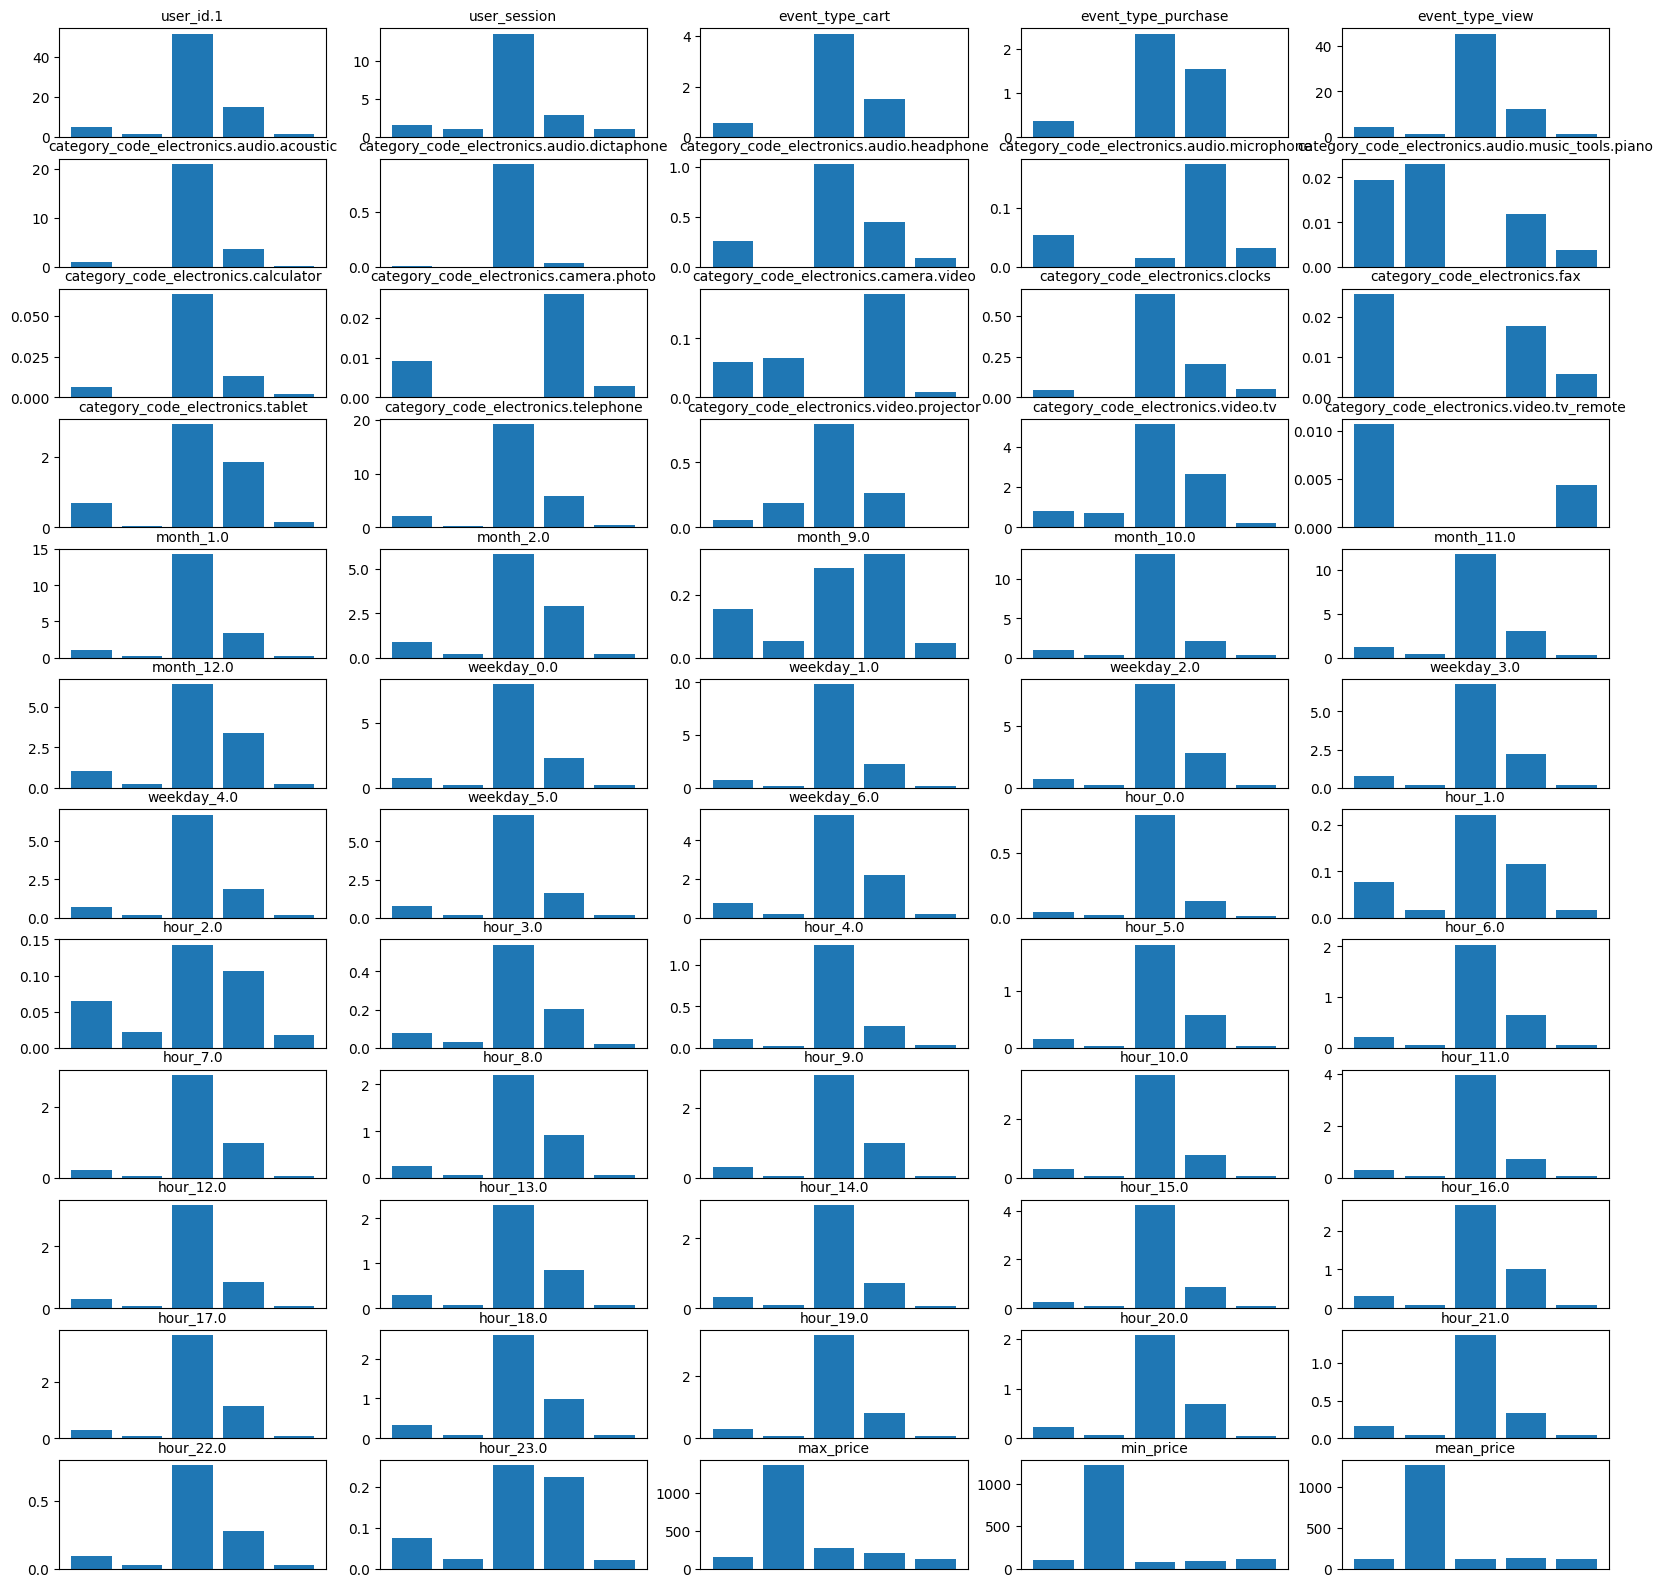

In [36]:
plt.figure(figsize=(20,20))
for idx, col in enumerate(df_group.columns):
    plt.subplot(12,5,idx+1)
    plt.bar(df_group.index,df_group[col])
    plt.gca().axes.xaxis.set_visible(False)
    plt.title(col, fontsize=10)
plt.show()

In [37]:
df.drop('user_id', axis = 1, inplace=True)

In [38]:
df.columns

Index(['user_id.1', 'user_session', 'event_type_cart', 'event_type_purchase',
       'event_type_view', 'category_code_electronics.audio.acoustic',
       'category_code_electronics.audio.dictaphone',
       'category_code_electronics.audio.headphone',
       'category_code_electronics.audio.microphone',
       'category_code_electronics.audio.music_tools.piano',
       'category_code_electronics.calculator',
       'category_code_electronics.camera.photo',
       'category_code_electronics.camera.video',
       'category_code_electronics.clocks', 'category_code_electronics.fax',
       'category_code_electronics.tablet',
       'category_code_electronics.telephone',
       'category_code_electronics.video.projector',
       'category_code_electronics.video.tv',
       'category_code_electronics.video.tv_remote', 'month_1.0', 'month_2.0',
       'month_9.0', 'month_10.0', 'month_11.0', 'month_12.0', 'weekday_0.0',
       'weekday_1.0', 'weekday_2.0', 'weekday_3.0', 'weekday_4.0',
     

In [39]:
df['view-cart'] = round(df.event_type_cart / df.event_type_view, 4) * 100
df['cart-purchase'] = round(df.event_type_purchase / df.event_type_cart, 4) * 100

In [40]:
df.corr()

,user_id.1,user_session,event_type_cart,event_type_purchase,event_type_view,category_code_electronics.audio.acoustic,category_code_electronics.audio.dictaphone,category_code_electronics.audio.headphone,category_code_electronics.audio.microphone,category_code_electronics.audio.music_tools.piano,...,hour_20.0,hour_21.0,hour_22.0,hour_23.0,max_price,min_price,mean_price,labels5,view-cart,cart-purchase
user_id.1,1.000000,0.550076,0.566028,0.464159,0.971451,0.520934,0.084129,0.117296,0.045733,0.021719,...,0.226087,0.190656,0.133885,0.102549,0.026515,-0.044761,-0.019967,-0.395212,0.208304,0.187853
user_session,0.550076,1.000000,0.165090,0.148311,0.575335,0.484258,0.048199,0.069525,0.007263,0.015615,...,0.117577,0.156968,0.078231,0.041989,0.002074,-0.012505,-0.007076,-0.150288,0.042047,0.085075
event_type_cart,0.566028,0.165090,1.000000,0.618670,0.381638,0.205491,0.079357,0.093111,0.044385,0.035711,...,0.144647,0.079024,0.075994,0.052314,-0.015794,-0.036972,-0.032219,-0.356687,0.655260,-0.002163
event_type_purchase,0.464159,0.148311,0.618670,1.000000,0.269225,0.189753,0.072570,0.083201,0.040418,0.024223,...,0.117985,0.066373,0.077593,0.043749,-0.016296,-0.031756,-0.029166,-0.273046,0.429926,0.809460
event_type_view,0.971451,0.575335,0.381638,0.269225,1.000000,0.529004,0.071228,0.105024,0.038361,0.015009,...,0.214830,0.193458,0.127611,0.101172,0.035334,-0.039839,-0.012820,-0.347888,0.061531,0.046813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
min_price,-0.044761,-0.012505,-0.036972,-0.031756,-0.039839,-0.036597,-0.004802,-0.052577,-0.037098,0.030771,...,-0.008754,-0.001423,-0.006112,-0.006581,0.706896,1.000000,0.952884,-0.263318,-0.034675,-0.056748
mean_price,-0.019967,-0.007076,-0.032219,-0.029166,-0.012820,-0.030453,-0.004732,-0.051576,-0.036059,0.029220,...,-0.003044,0.000822,-0.003880,-0.003573,0.855398,0.952884,1.000000,-0.274062,-0.034711,-0.063184
labels5,-0.395212,-0.150288,-0.356687,-0.273046,-0.347888,-0.124878,-0.010186,-0.061487,-0.010204,-0.040700,...,-0.100228,-0.090566,-0.059178,-0.054371,-0.235363,-0.263318,-0.274062,1.000000,-0.372496,-0.124720
view-cart,0.208304,0.042047,0.655260,0.429926,0.061531,0.059652,0.006921,0.045268,0.026625,0.025888,...,0.051895,0.036323,0.033850,0.028311,-0.027231,-0.034675,-0.034711,-0.372496,1.000000,-0.093393


In [41]:
mask = np.zeros_like(df.corr(), dtype='bool')
mask[np.triu_indices_from(mask)] = True

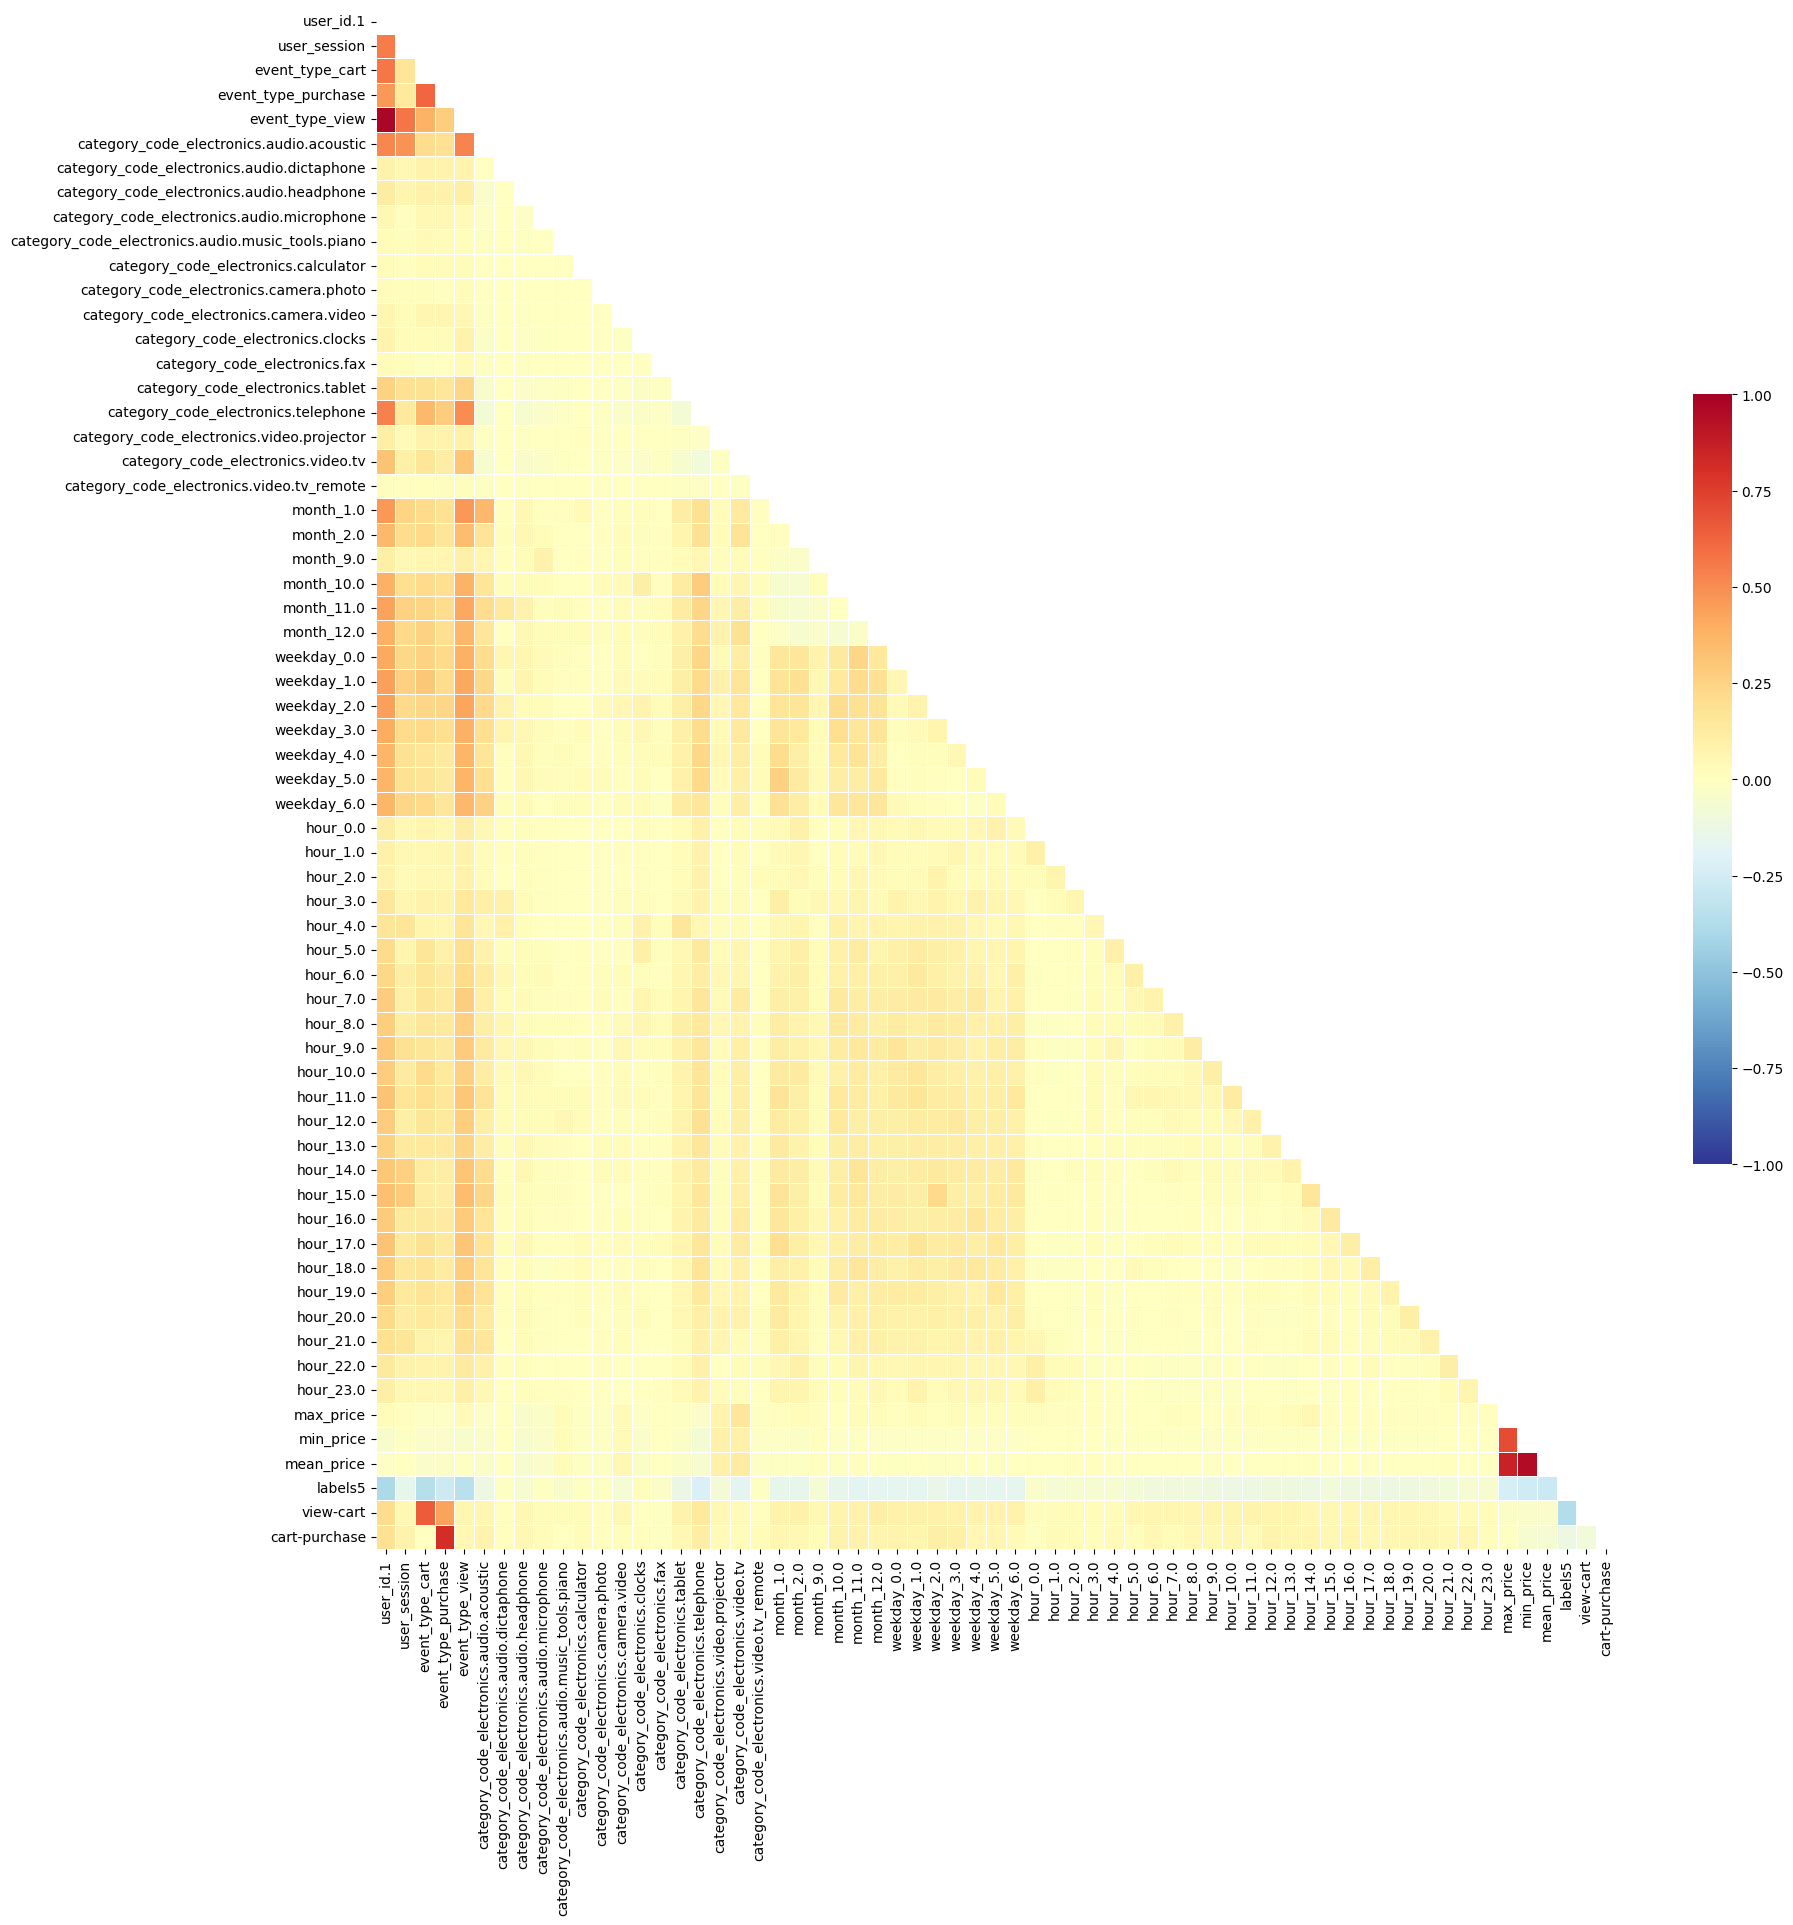

In [42]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), 
            cmap = 'RdYlBu_r', 
            mask=mask,      
            linewidths=.5,  
            cbar_kws={"shrink": .5},
            vmin = -1,vmax = 1 
           )  
plt.show()

In [43]:
df1 = df[df['labels5'] == 1]
df2 = df[df['labels5'] == 2]
df3 = df[df['labels5'] == 3]
df4 = df[df['labels5'] == 4]
df0 = df[df['labels5'] == 0]

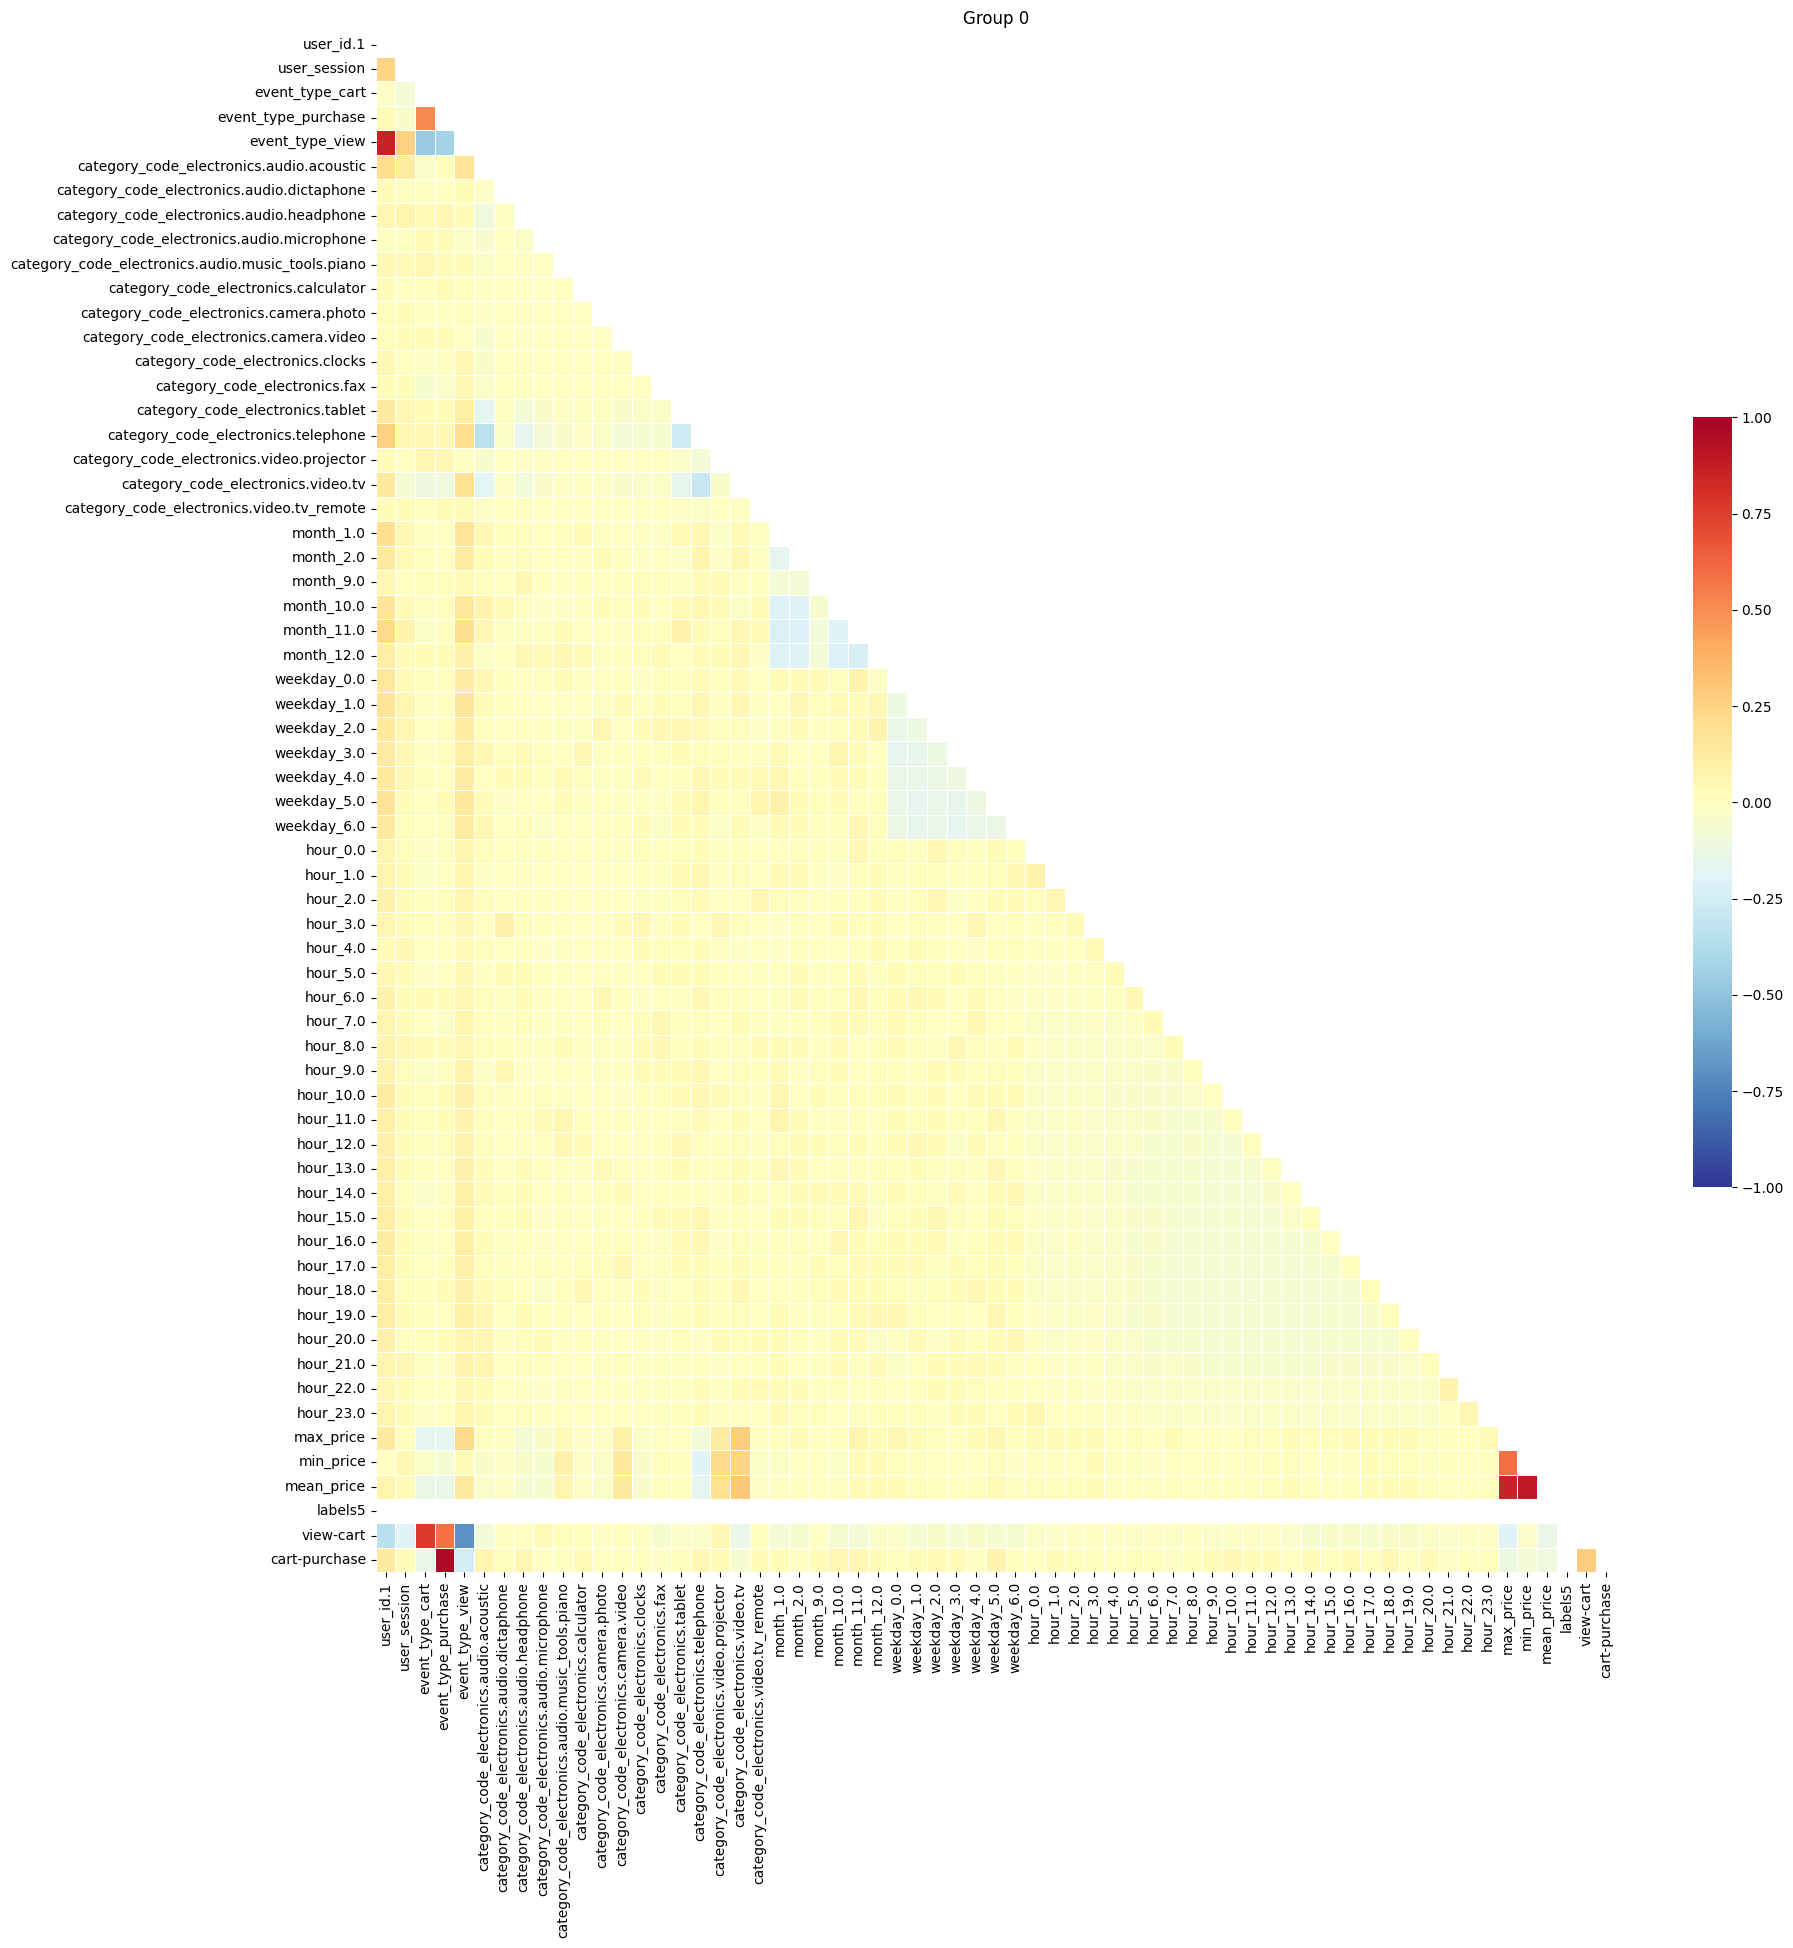

In [44]:
plt.figure(figsize=(20, 20))
sns.heatmap(df0.corr(), 
            cmap = 'RdYlBu_r', 
            mask=mask,      
            linewidths=.5,  
            cbar_kws={"shrink": .5},
            vmin = -1,vmax = 1   
           )  
plt.title('Group 0')

plt.show()

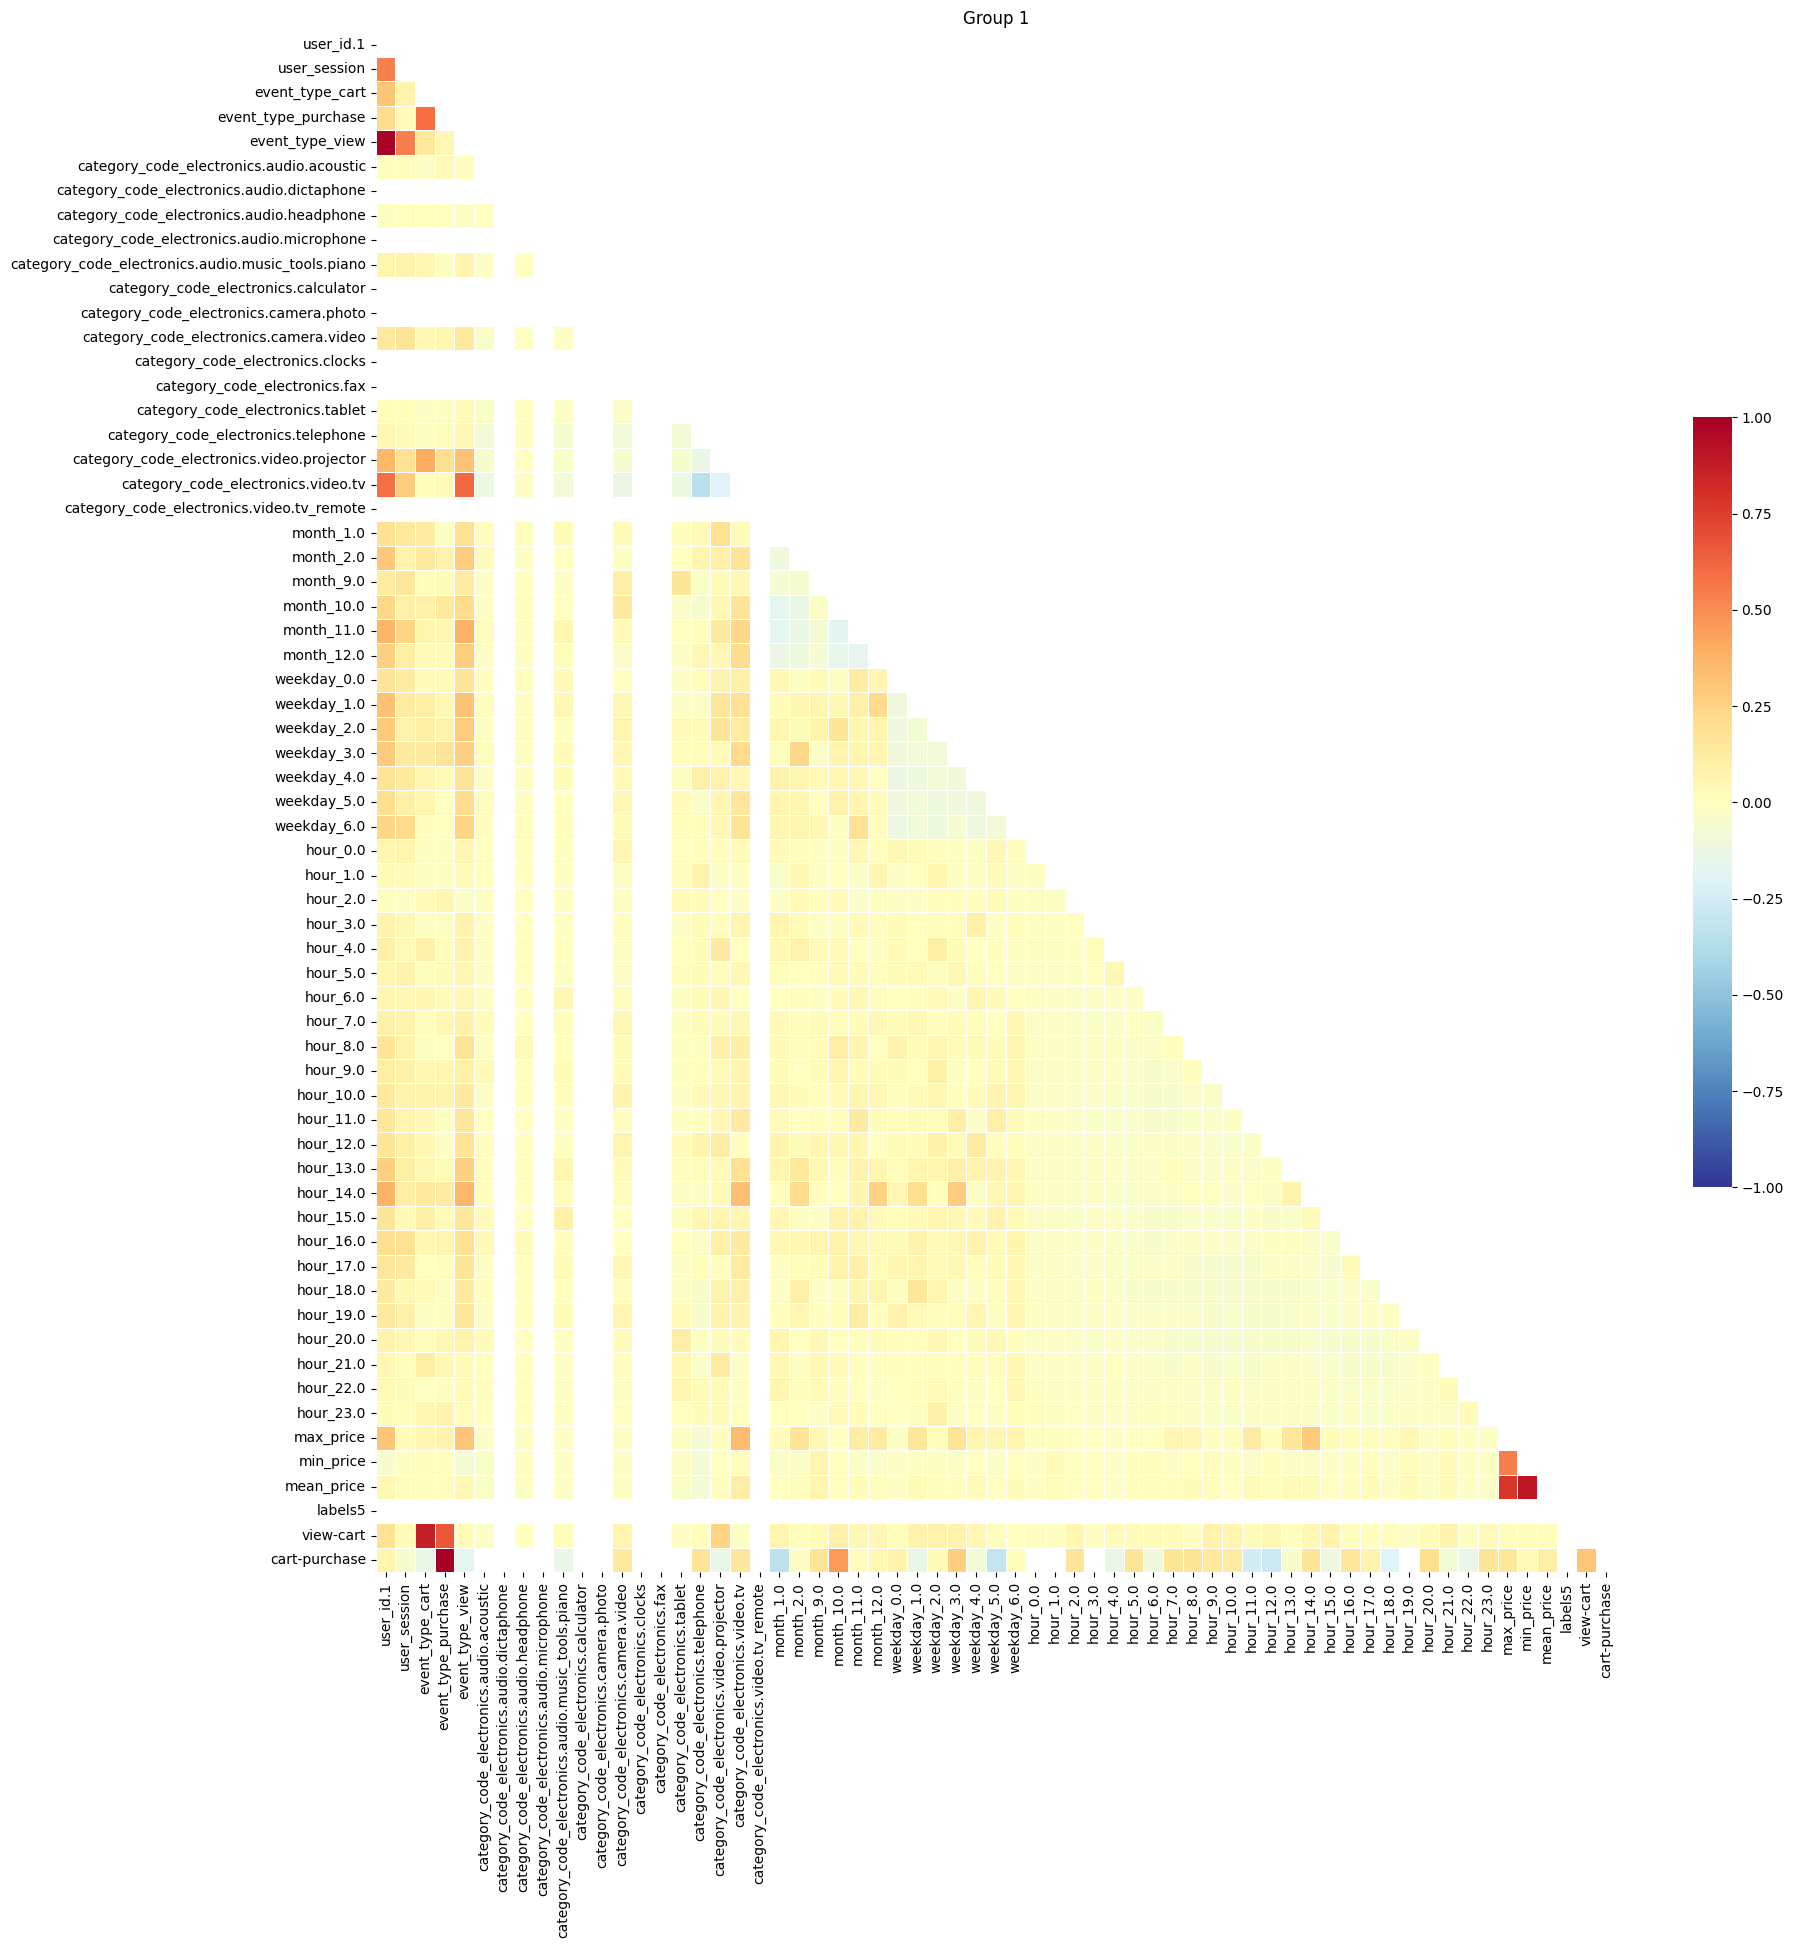

In [45]:
plt.figure(figsize=(20, 20))
sns.heatmap(df1.corr(), 
            cmap = 'RdYlBu_r', 
            mask=mask,      
            linewidths=.5,  
            cbar_kws={"shrink": .5},
            vmin = -1,vmax = 1 
           )  
plt.title('Group 1')
plt.show()

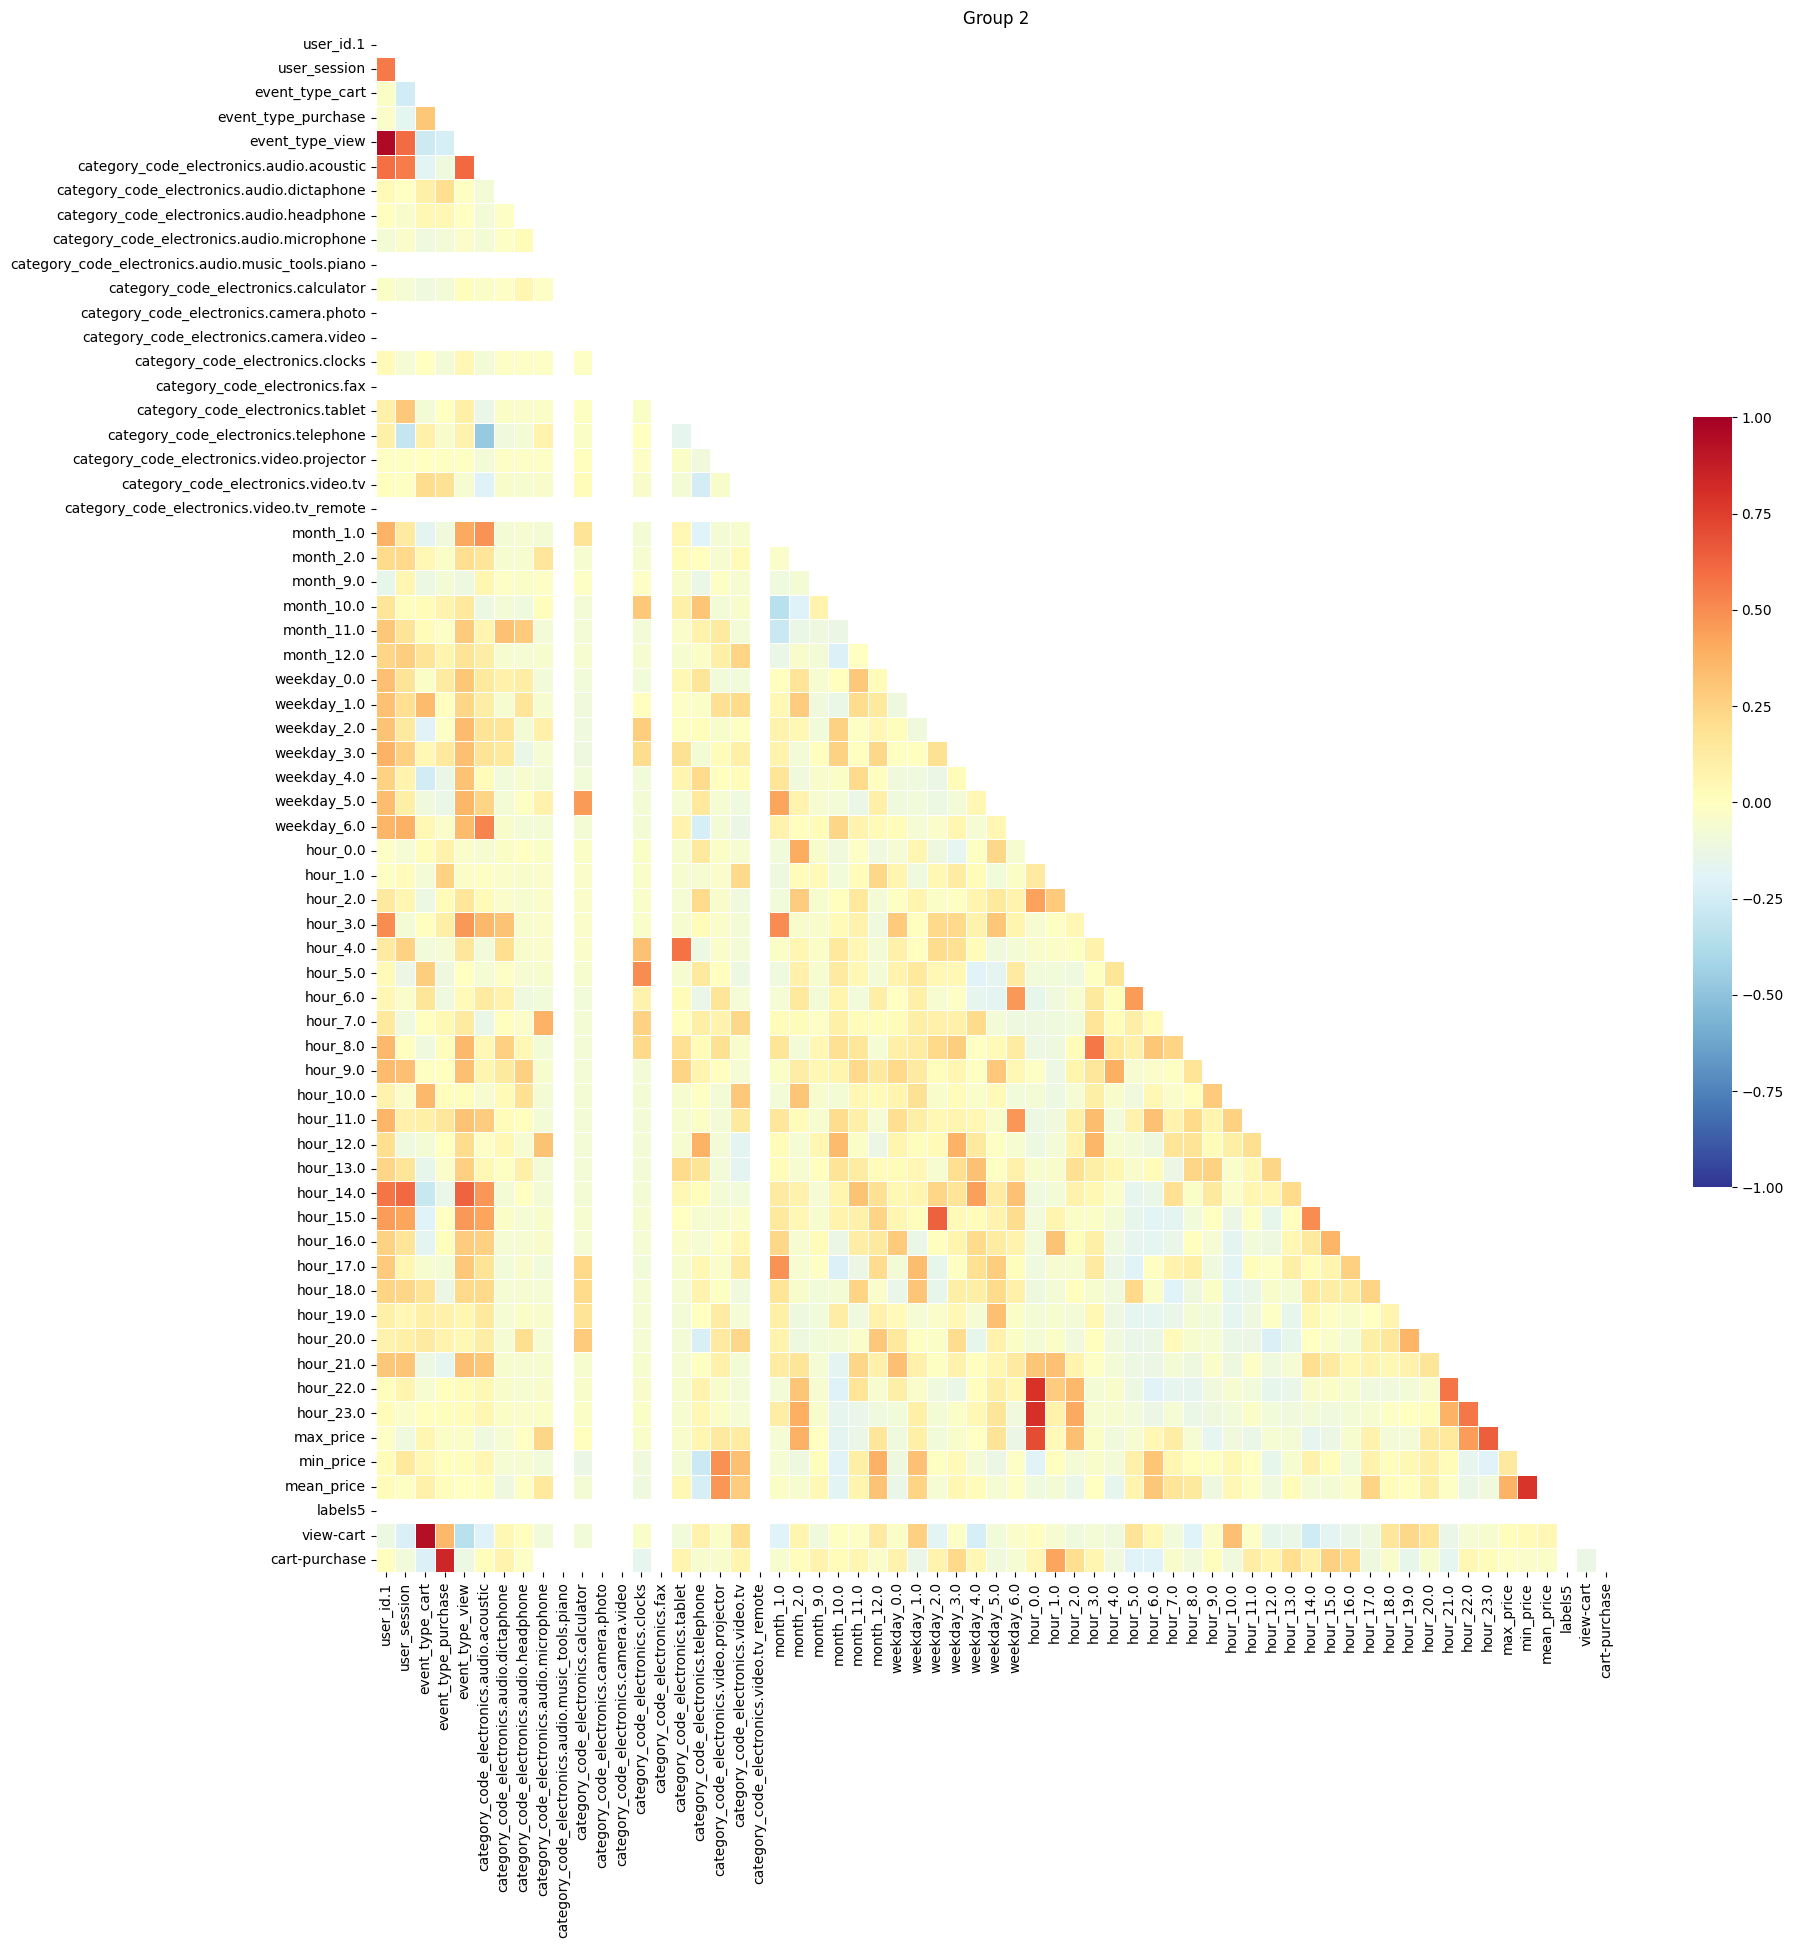

In [46]:
plt.figure(figsize=(20, 20))
sns.heatmap(df2.corr(), 
            cmap = 'RdYlBu_r', 
            mask=mask,      
            linewidths=.5, 
            cbar_kws={"shrink": .5},
            vmin = -1,vmax = 1  
           )  
plt.title('Group 2')

plt.show()

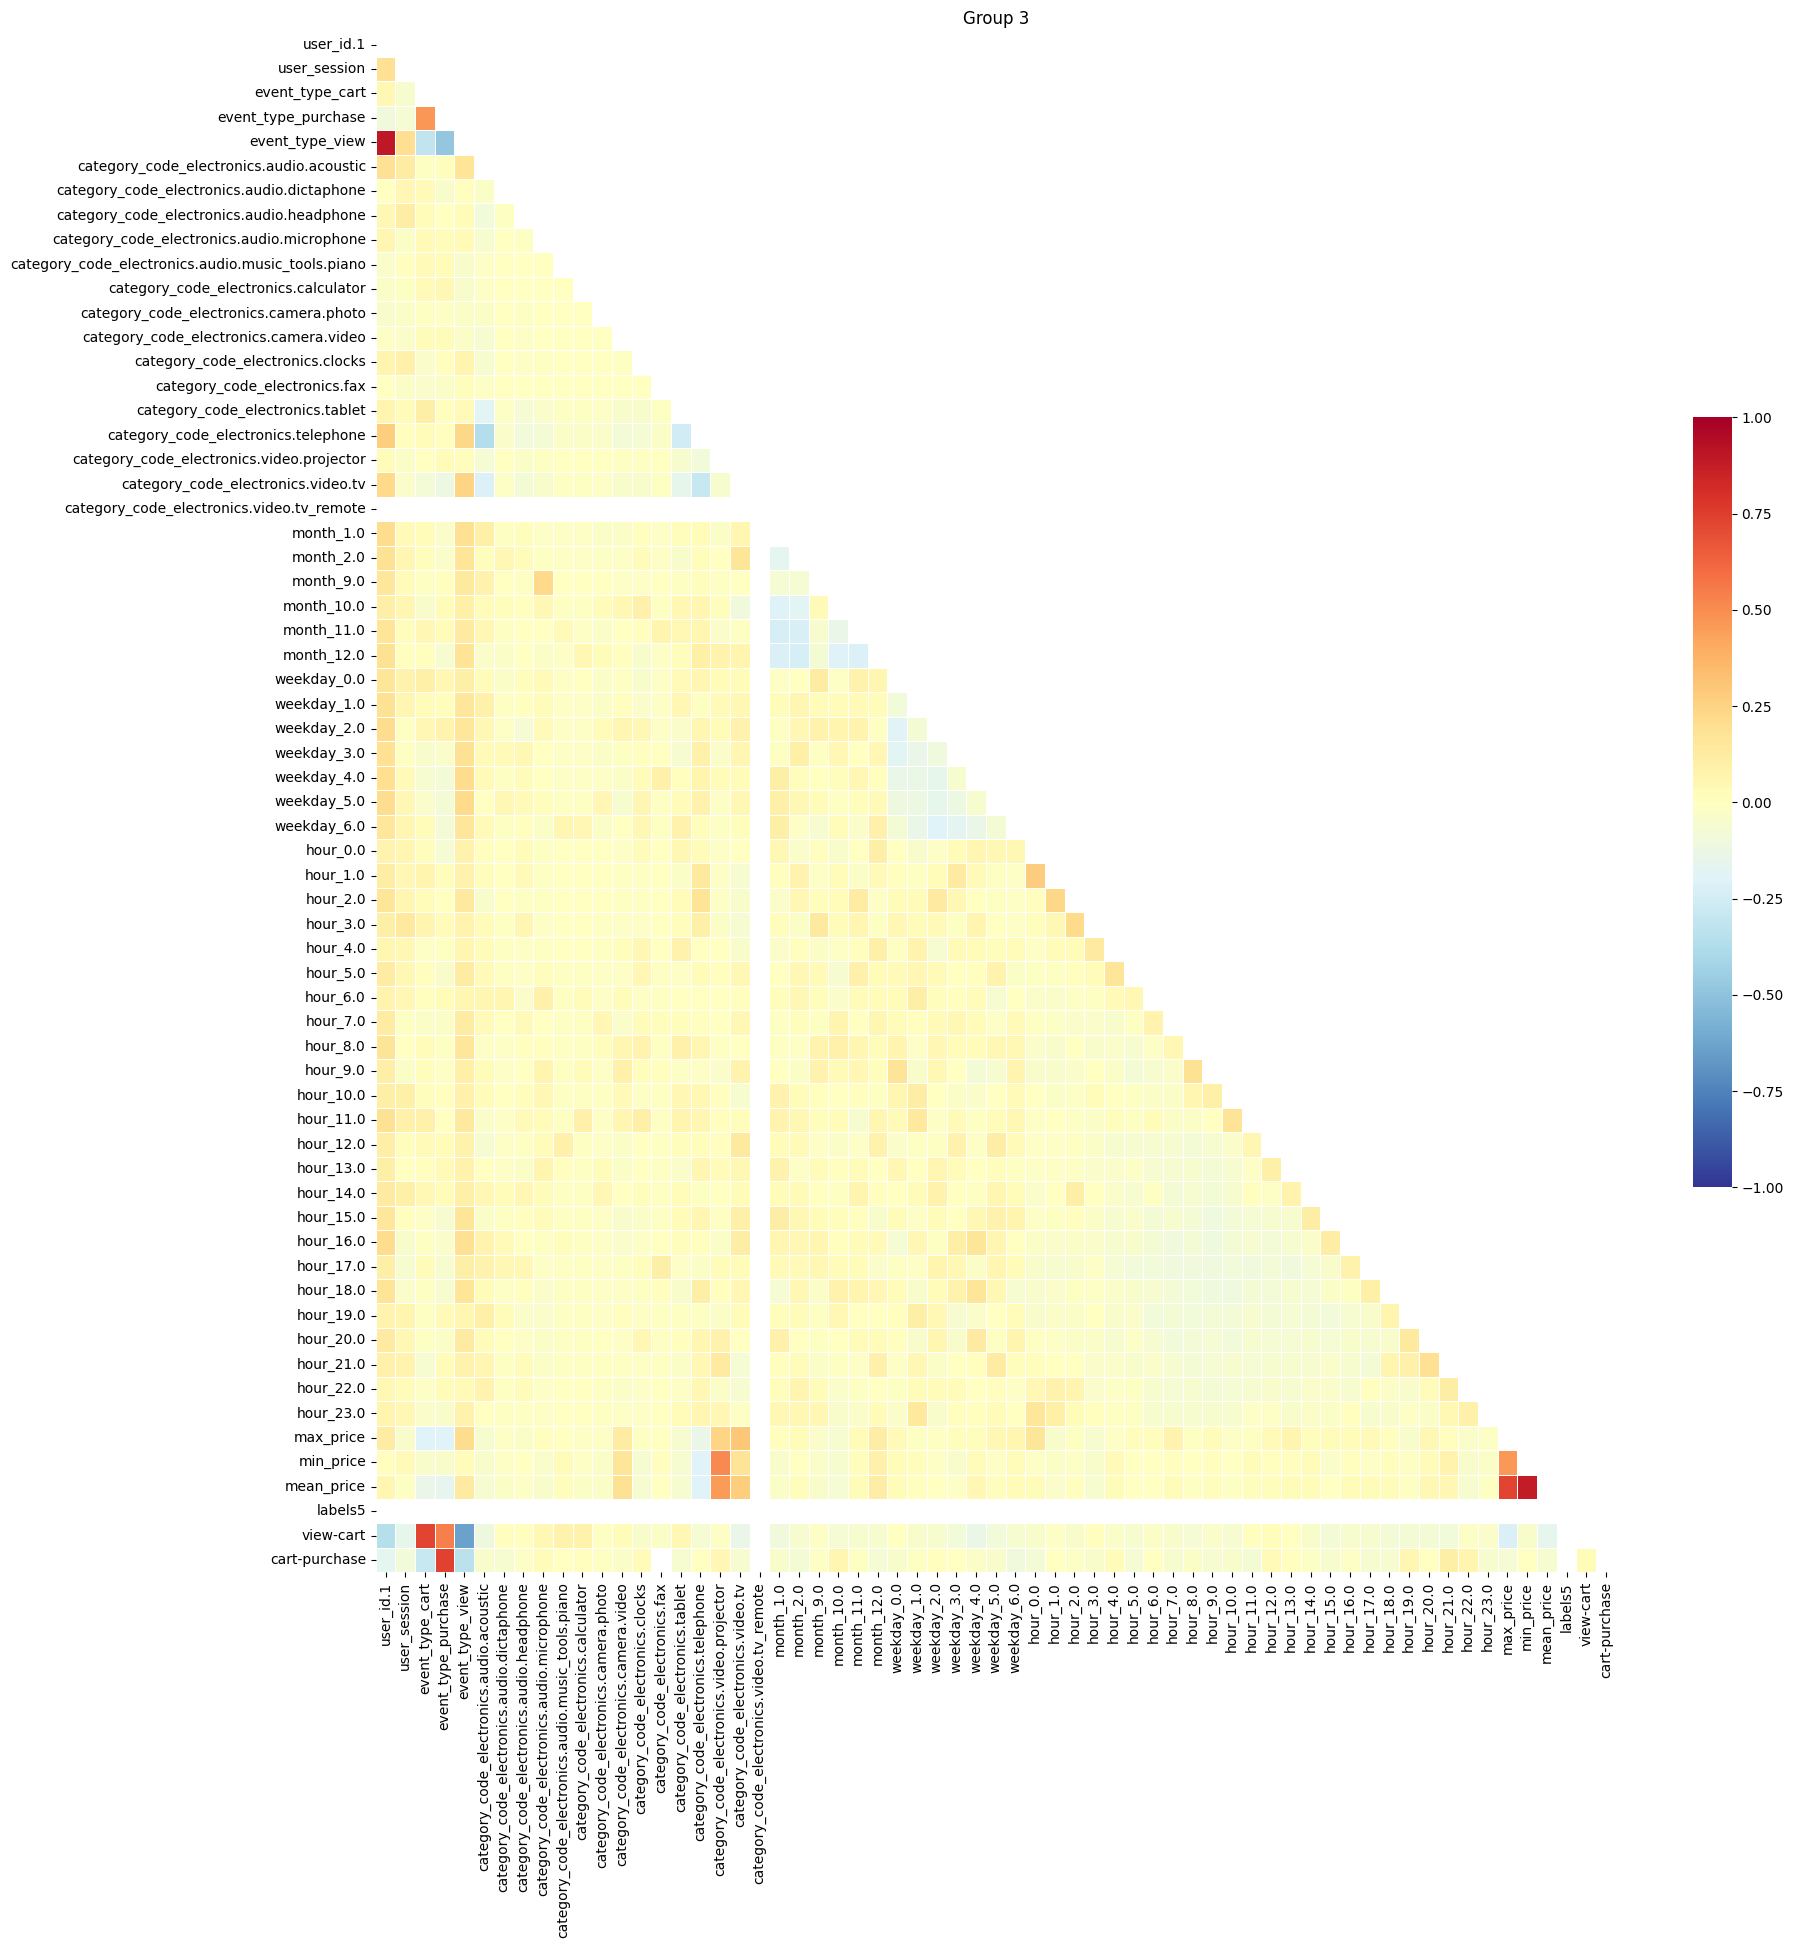

In [47]:
plt.figure(figsize=(20, 20))
sns.heatmap(df3.corr(), 
            cmap = 'RdYlBu_r', 
            mask=mask,     
            linewidths=.5, 
            cbar_kws={"shrink": .5},
            vmin = -1,vmax = 1 
           )  
plt.title('Group 3')

plt.show()

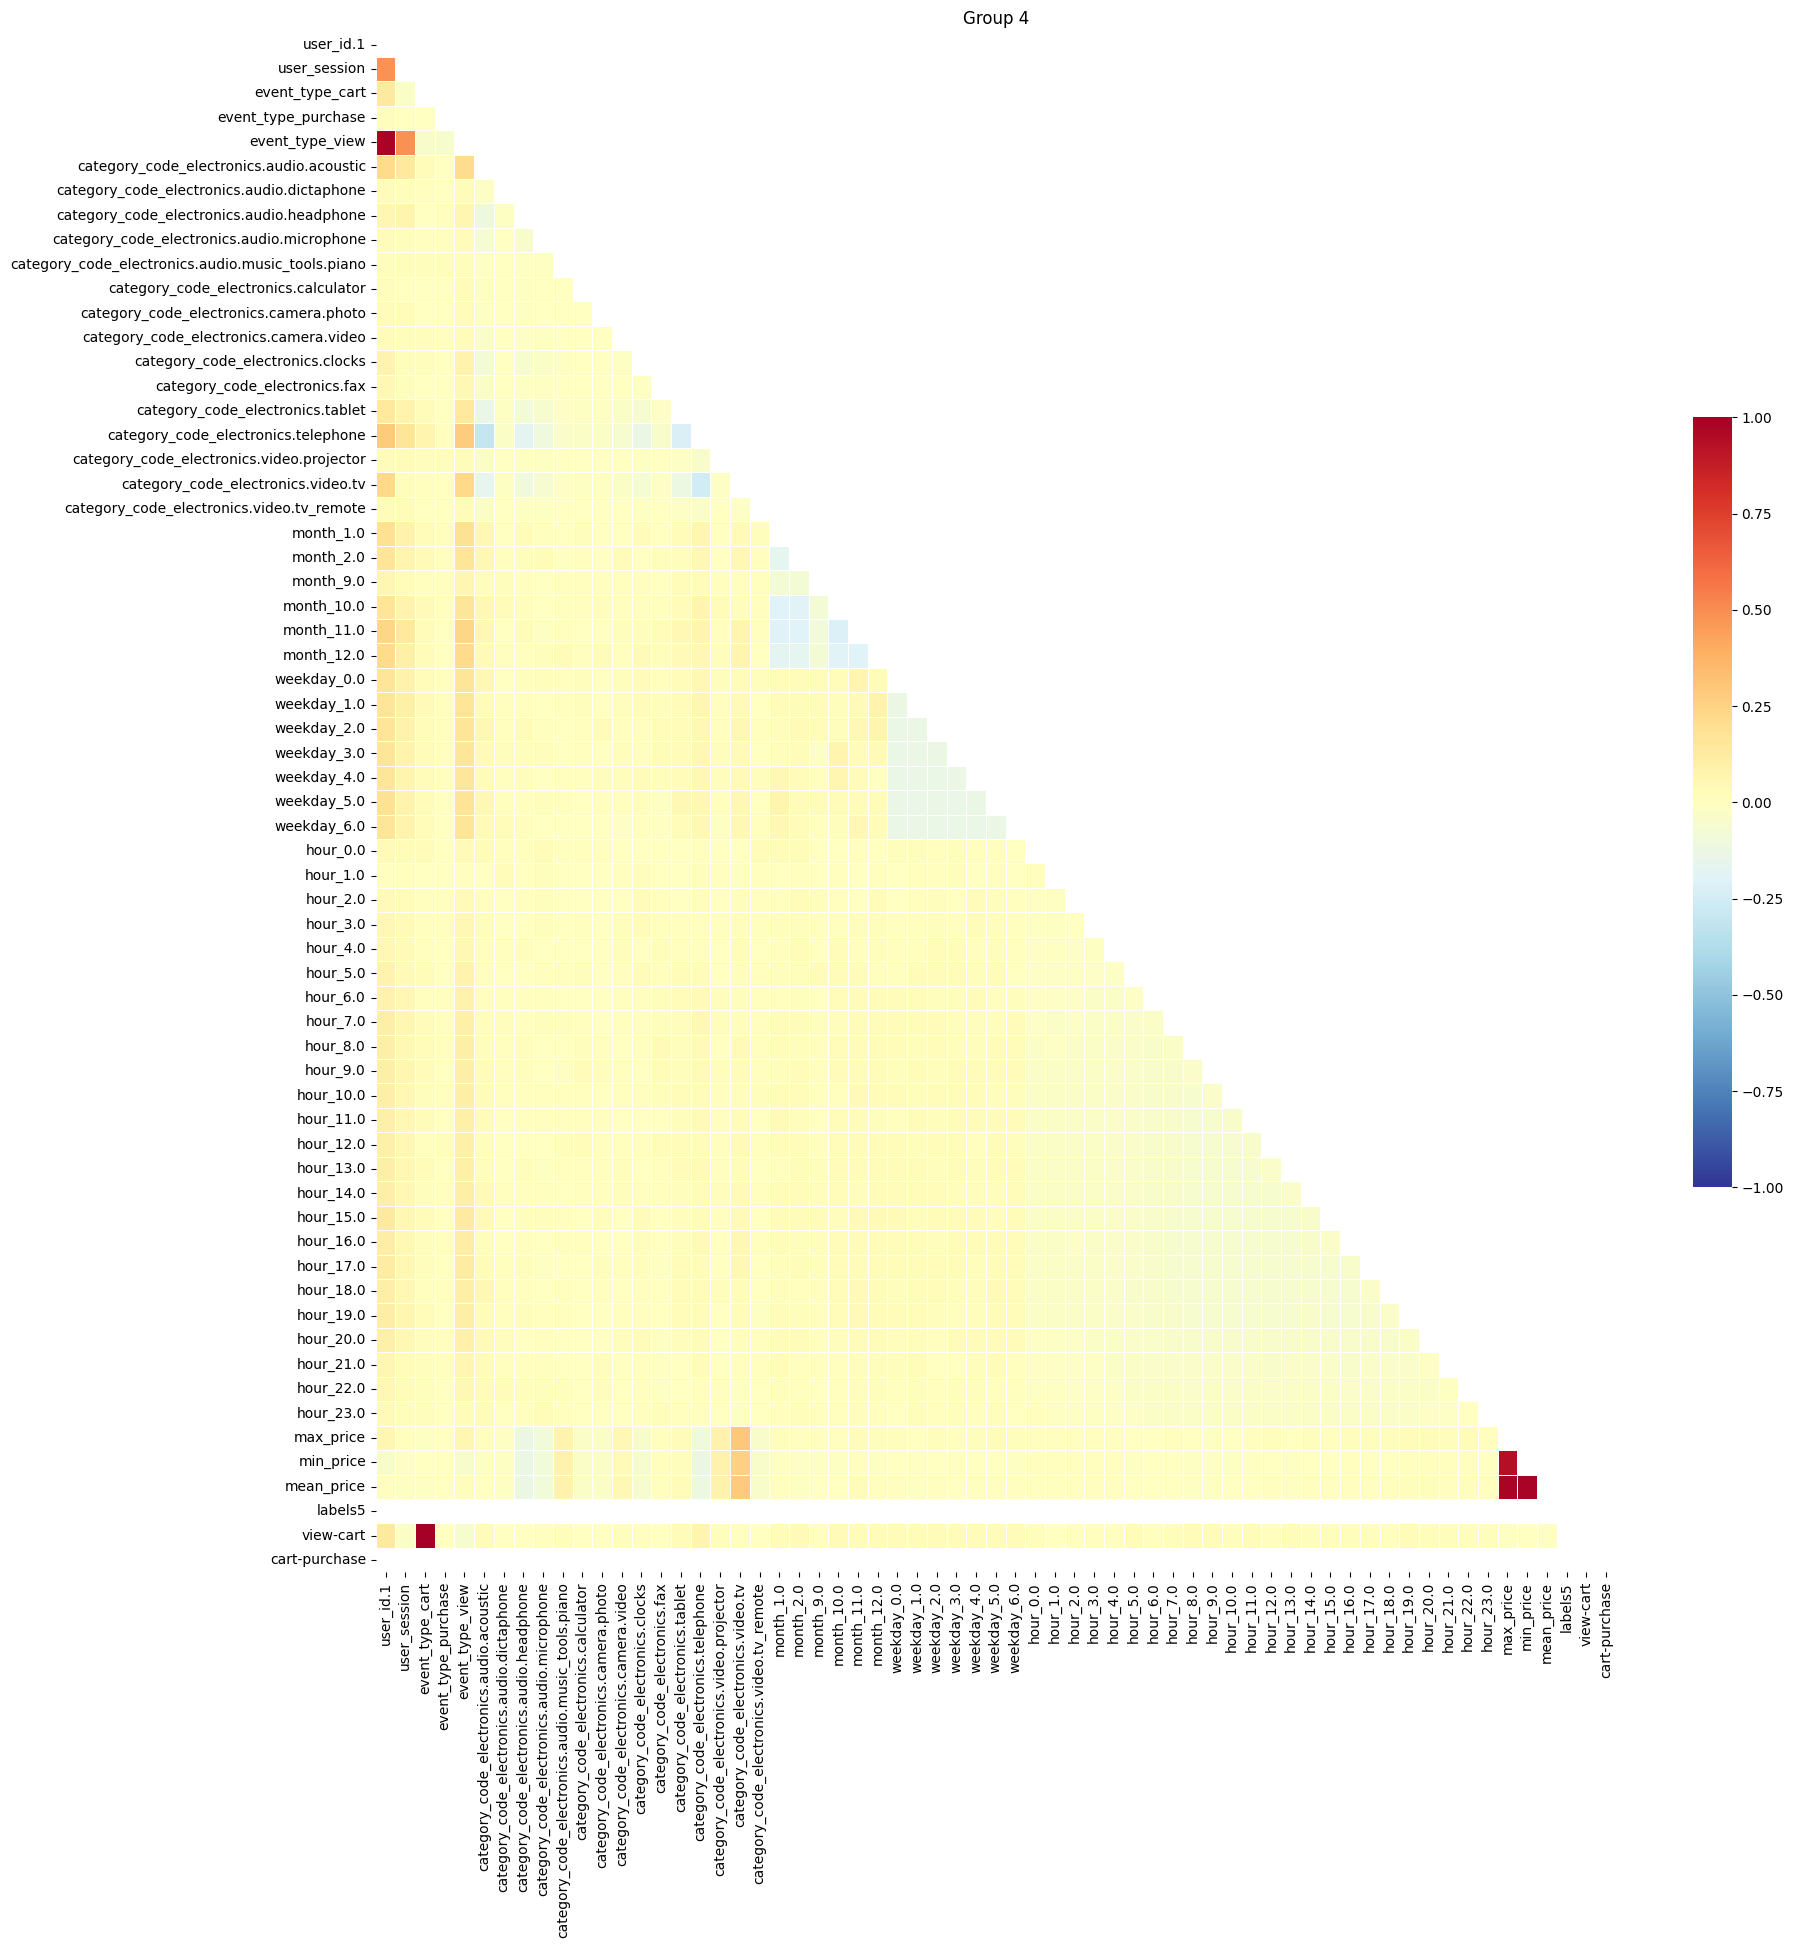

In [48]:
plt.figure(figsize=(20, 20))
sns.heatmap(df4.corr(), 
            cmap = 'RdYlBu_r', 
            mask=mask,     
            linewidths=.5, 
            cbar_kws={"shrink": .5},
            vmin = -1,vmax = 1   
           )  
plt.title('Group 4')

plt.show()